In [6]:
#data cleaning with imputation for missing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
df = pd.read_csv("kinase_tox.csv")

In [10]:
df.head()

,molecule_chembl_id,canonical_smiles,IC50,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,target,Druglikeness,Mutagenic,Tumorigenic,Reproductive Effective,Irritant
0,CHEMBL4557543,COc1cc(OC)c(Cl)c(-c2ccc3c(NC(=O)c4ccc(N5CCN(C)...,14.0,active,575.884,5.60640,2,7,7.853872,FGFR,8.89410,none,high,high,none
1,CHEMBL3904778,C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(OC)cc3OC)ncc2Br)c1,65.0,active,471.311,4.91670,2,7,7.187087,EGFR,-10.11200,high,low,low,low
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,10000.0,inactive,340.637,5.04890,0,2,5.000000,EGFR,0.70500,none,none,none,none
3,CHEMBL604712,CC(C)(C)C(=O)N1Cc2c(NC(=O)c3cc(F)cc(F)c3)n[nH]...,10000.0,inactive,376.407,3.56360,2,3,5.000000,ABL,1.01070,none,none,none,none
4,CHEMBL556684,COc1cc(O)c2c(c1)C(=O)c1cc(C)c(O)c(O)c1C2=O,4.0,active,300.266,1.89582,3,6,8.397940,EGFR,-0.97635,low,none,none,high


In [12]:
len(df.columns)

15

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28314 entries, 0 to 28313
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   molecule_chembl_id      28314 non-null  object 
 1   canonical_smiles        28314 non-null  object 
 2   IC50                    28314 non-null  float64
 3   class                   28314 non-null  object 
 4   MW                      28314 non-null  float64
 5   LogP                    28314 non-null  float64
 6   NumHDonors              28314 non-null  int64  
 7   NumHAcceptors           28314 non-null  int64  
 8   pIC50                   28314 non-null  float64
 9   target                  28314 non-null  object 
 10  Druglikeness            28314 non-null  float64
 11  Mutagenic               28314 non-null  object 
 12  Tumorigenic             28314 non-null  object 
 13  Reproductive Effective  28314 non-null  object 
 14  Irritant                28314 non-null

In [16]:
#remove columns 
dropcolumns=['molecule_chembl_id','canonical_smiles']
df = df.drop(dropcolumns,axis=1)

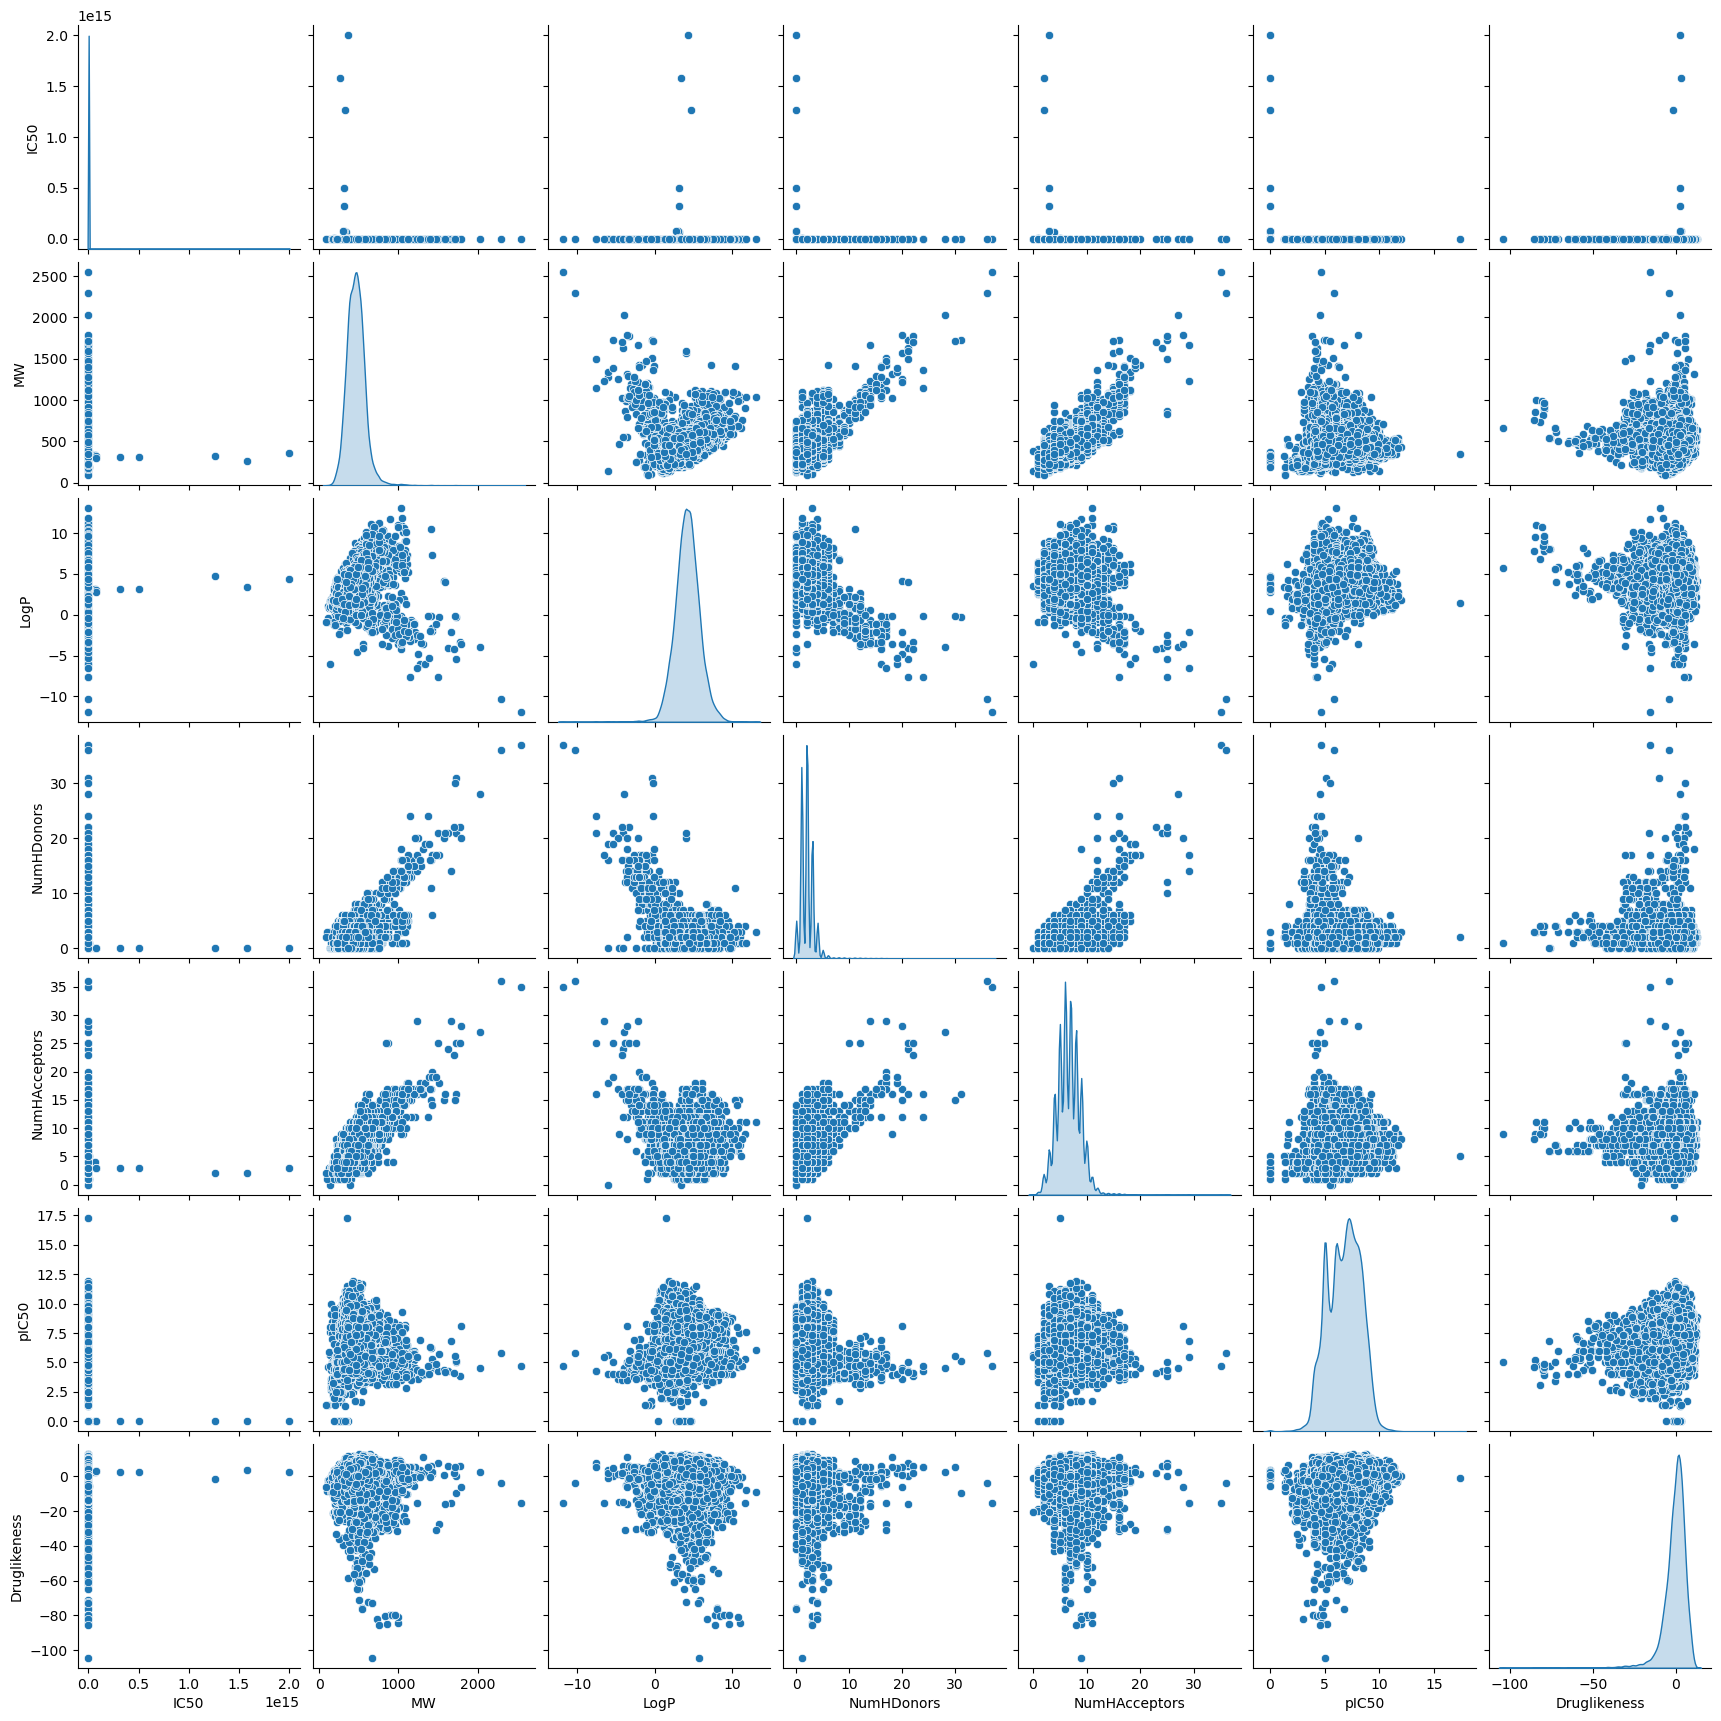

In [20]:
# Relationships between features
sns.pairplot(data=df,diag_kind='kde')

In [69]:
df = df.drop('target',axis=1)

In [71]:
df.head()

,IC50,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,Druglikeness,Mutagenic,Tumorigenic,Reproductive Effective,Irritant
0,14.0,active,575.884,5.60640,2,7,7.853872,8.89410,none,high,high,none
1,65.0,active,471.311,4.91670,2,7,7.187087,-10.11200,high,low,low,low
2,10000.0,inactive,340.637,5.04890,0,2,5.000000,0.70500,none,none,none,none
3,10000.0,inactive,376.407,3.56360,2,3,5.000000,1.01070,none,none,none,none
4,4.0,active,300.266,1.89582,3,6,8.397940,-0.97635,low,none,none,high


In [32]:
print(df.dtypes)

IC50                      float64
class                      object
MW                        float64
LogP                      float64
NumHDonors                  int64
NumHAcceptors               int64
pIC50                     float64
target                     object
Druglikeness              float64
Mutagenic                  object
Tumorigenic                object
Reproductive Effective     object
Irritant                   object
dtype: object


In [73]:
# convert to String first
encodecols=['class', 'Mutagenic', 'Tumorigenic', 'Reproductive Effective','Irritant']
df[encodecols] = df[encodecols].apply(lambda col: col.astype(str))

In [75]:
df_enc = pd.get_dummies(df, columns=encodecols)

In [77]:
df_enc = df_enc.astype(int)

In [79]:
df_enc.head()

,IC50,MW,LogP,NumHDonors,NumHAcceptors,pIC50,Druglikeness,class_active,class_inactive,class_intermediate,...,Mutagenic_none,Tumorigenic_high,Tumorigenic_low,Tumorigenic_none,Reproductive Effective_high,Reproductive Effective_low,Reproductive Effective_none,Irritant_high,Irritant_low,Irritant_none
0,14,575,5,2,7,7,8,1,0,0,...,1,1,0,0,1,0,0,0,0,1
1,65,471,4,2,7,7,-10,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,10000,340,5,0,2,5,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,10000,376,3,2,3,5,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,4,300,1,3,6,8,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0


In [93]:
df_objs = df_enc.select_dtypes(include='object')
df_nums = df_enc.select_dtypes(exclude='object')

In [95]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28314 entries, 0 to 28313
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   IC50                         28314 non-null  int64
 1   MW                           28314 non-null  int64
 2   LogP                         28314 non-null  int64
 3   NumHDonors                   28314 non-null  int64
 4   NumHAcceptors                28314 non-null  int64
 5   pIC50                        28314 non-null  int64
 6   Druglikeness                 28314 non-null  int64
 7   class_active                 28314 non-null  int64
 8   class_inactive               28314 non-null  int64
 9   class_intermediate           28314 non-null  int64
 10  Mutagenic_high               28314 non-null  int64
 11  Mutagenic_low                28314 non-null  int64
 12  Mutagenic_none               28314 non-null  int64
 13  Tumorigenic_high             28314 non-null  i

In [108]:
df_enc.to_csv('Encoded_kinase_tox.csv')